# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


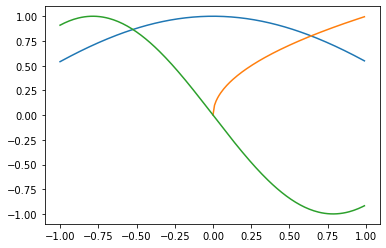

0.6412421652574347 132


In [29]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1, 1, 0.01)
y1 = np.cos(x)
y2 = np.sqrt(x)
# y3 = -2*np.sin(x)*np.cos(x) Derivative of f(x)=cos(x)^2
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

from math import cos, sqrt
def fixedp(f,x0,alpha,required_eps=10e-4):
    eps = 1
    itr = 0
    while(eps > required_eps):
        x = f(x0)      
        eps = abs(x0-alpha*x) 
        x0 = x
        itr = itr + 1
    return x, itr

f = lambda x: cos(x)*cos(x)

a1,b1 = fixedp(f, 0.5, 1)
# a2,b2 = fixedp(f, 0.5, 0.5) Epsilon is converges to a value which is higher than required epsilon value 
# a3,b3 = fixedp(f, 0.5, 2) The same situation.
print(a1,b1)
# print(a2,b2)
# print(a3,b3)

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [36]:
from math import cos, sin
def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
    itr = 0
    x0 = point_0
    x1 = point_1
    x2 = point_2
    while abs(x1-x0) > eps: # last guess and new guess are v close
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
        L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
        L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
        new = L0 + L1 + L2
        x0, x1, x2 = new, x0, x1
        itr += 1
    return x0, itr

f = lambda x: x-(cos(x)/sin(x))

root, iterations = inv_quad_interpolation(f, 0.6, 0.8, 1, 10e-4)
print("root is:", root, "steps taken:", iterations)

root is: 0.860333575377475 steps taken: 2


Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


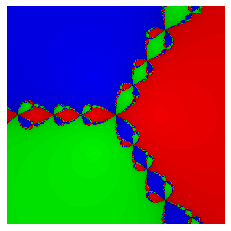

In [50]:
import math

def equation(z):
    return z ** 3 - 1


def newton_raphson(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    """ Fractals using newton-raphson """
    # drawing area
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5
    pixels = np.arange(width * height * 3, dtype=np.uint32).reshape(height, width, 3)
    h = 1e-7  # step size for numerical derivative
    eps = 1e-3  # max error allowed
    r1 = 1
    r2 = complex(-0.5, math.sin(2 * math.pi / 3))
    r3 = complex(-0.5, -1 * math.sin(2 * math.pi / 3))

    multcol = 5
    for y in range(height):
        zy = (y + y_off) * (yb - ya) / (zoom * (height - 1)) + ya

        for x in range(width):
            zx = (x + x_off) * (xb - xa) / (zoom * (width - 1)) + xa

            z = complex(zx, zy)
            count = 0

            for i in range(niter):
                dz = (equation(z + complex(h, h)) - equation(z)) / complex(h, h)
                if dz == 0:
                    break

                count += 1
                if count > 255:
                    break

                znext = z - equation(z) / dz  # Newton iteration
                if abs(znext - z) < eps:  # stop when close enough to any root
                    break

                z = znext

            if abs(z - r1) < eps:
                pixels[y, x] = (255 - count * multcol, 0, 0)
            elif abs(z - r2) <= eps:
                pixels[y, x] = (0, 255 - count * multcol, 0)
            elif abs(z - r3) <= eps:
                pixels[y, x] = (0, 0, 255 - count * multcol)
    return pixels


pimg = newton_raphson(width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0)
plt.axis('off')
plt.imshow(pimg)
plt.show()


Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).